In [ ]:
import os
os.chdir("/Users/fabiotejedor/Downloads")

In [ ]:
import pandas as pd
db_transactions = pd.read_csv("transactions.csv")
db_transactions.head(20)
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
db_transactions.isnull().values.any()

False

In [ ]:
db_transactions.describe()

,timestamp,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06
mean,2.434319e+02,1.479531e+05,8.339802e+05,6.860270e+05,1.297193e+06,1.445146e+06
std,1.423561e+02,5.519739e+05,2.890095e+06,2.943681e+06,3.441619e+06,3.647220e+06
min,1.000000e+00,0.000000e+00,-4.621192e+07,-9.244552e+07,-4.366623e+06,-4.234680e+06
25%,1.560000e+02,3.954593e+03,0.000000e+00,-1.072120e+05,0.000000e+00,8.961312e+03
50%,2.390000e+02,3.424565e+04,1.416400e+04,-2.773930e+03,1.330728e+04,1.830557e+05
75%,3.350000e+02,1.744628e+05,1.073520e+05,6.296063e+04,1.277121e+06,1.514394e+06
max,7.430000e+02,9.244552e+07,7.743097e+07,7.742894e+07,3.572774e+08,3.574408e+08


In [ ]:
print(db_transactions["timestamp"].unique().size)
print(db_transactions["type"].unique().size)
print(db_transactions["nameOrig"].unique().size )
print(db_transactions["nameDest"].unique().size)

743
1
6353308
2722364


In [ ]:
print(db_transactions["oldbalanceOrig"].min())
print(db_transactions["newbalanceOrig"].min())
print(db_transactions["oldbalanceDest"].min())
print(db_transactions["newbalanceDest"].min())

-46211920.92
-92445516.64
-4366622.92
-4234680.13


In [ ]:
varNum = ["oldbalanceOrig", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
for ii in range(len(varNum)):
    print("Negative Values for " + varNum[ii]+ ": " + str(sum(db_transactions[varNum[ii]]< -10000)))


Negative Values for oldbalanceOrig: 5964
Negative Values for newbalanceOrig: 3397193
Negative Values for oldbalanceDest: 813
Negative Values for newbalanceDest: 399


In [ ]:
sum(db_transactions["oldbalanceOrig"] == 0)

2552249

In [ ]:
db_minOrig = db_transactions.head().groupby("nameOrig").min()
db_minOrig.head()

### Description and inconsistencies 

Description of each variables 

In [ ]:
df = db_transactions
df["amountOrig"] =  round(abs(df['oldbalanceOrig'] - df['newbalanceOrig']), 2)
df["amountDest"] =  round(abs(df['oldbalanceDest'] - df['newbalanceDest']), 2)
df["difamountAmOr"] = round(df["amount"] - df["amountOrig"],3)
df["difamountDesOr"] = round(df["amount"] - df["amountDest"], 3)
df["difamountOD"] = round(df["amountOrig"] - df["amountDest"], 3)
df = pd.DataFrame(df)

1- Checking if there are inconsistencies between the "amount" and the variables Origin, Destination 

In [ ]:
print(pd.DataFrame(pd.value_counts(df.difamountAmOr, normalize = True))*100)
print(pd.DataFrame(pd.value_counts(df.difamountDesOr, normalize = True))*100)

       difamountAmOr
 0.00      87.037227
-0.01      12.953025
 0.01       0.009748
       difamountDesOr
 0.00       65.372534
 0.01       30.863778
-0.01        2.575724
 0.02        1.187951
-0.02        0.000013


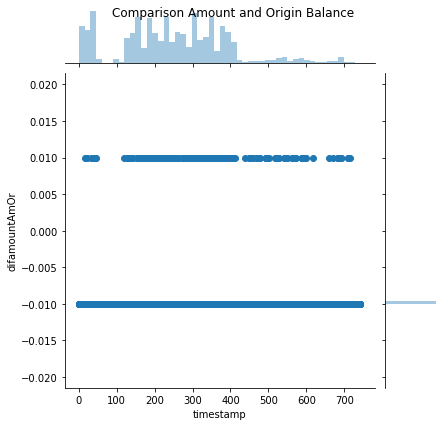

In [ ]:
g = sns.jointplot(x='timestamp',y='difamountAmOr',data=df[df["difamountAmOr"] != 0], kind='scatter')
g.fig.suptitle("Comparison Amount and Origin Balance")
plt.savefig("Comparison_Amount_Origin.png")

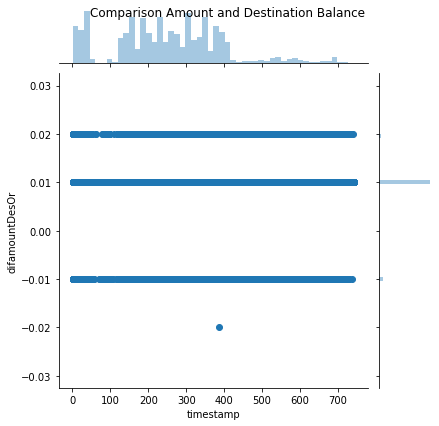

In [ ]:
d = sns.jointplot(x='timestamp',y='difamountDesOr',data=df[df["difamountDesOr"] != 0], kind='scatter')
d.fig.suptitle("Comparison Amount and Destination Balance")
plt.savefig("Comparison_Amount_Destination.png")

### Fraud detection

In [ ]:
df["amountOrig"] =  round(abs(df['oldbalanceOrig'] - df['newbalanceOrig']), 2)
df["difamountOrig"] = abs(df['amountOrig'] - round(df['amount'], 2))
vvv = df['amountOrig'] == round(df['amount'], 2)

In [ ]:
vvv.value_counts()
df_Orig1 = df.loc[~vvv]
df_Orig1.head()
df_Orig1.shape

(1002649, 15)

In [ ]:
ddd = df_Orig1["nameOrig"].to_frame()
ddd["nameOrig"].value_counts().to_frame().shape

(1001899, 1)

In [ ]:
df["difamountOD"] = df["amountOrig"] - df["amountDest"]
inconsistent = df[df["difamountOD"] != 0]
inconsistent["difamountOD"] = round(inconsistent["difamountOD"], 3)

/Users/fabiotejedor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ddd = inconsistent["difamountOD"].unique()
for ii in range(len(ddd)):
    jjj = inconsistent.loc[inconsistent["difamountOD"] == ddd[ii]]
    print("For:" + str(ddd[ii]) + " " + str(jjj.shape))

For:0.01 (2378453, 15)
For:0.02 (597109, 15)
For:-0.01 (199700, 15)
For:-0.02 (28, 15)
For:0.03 (10, 15)


In [ ]:
vect_Incon = dict(enumerate(ddd))
for ii in range(len(vect_Incon)):
    vect_Incon["incon_" +  str(ii)] = vect_Incon.pop(ii)
vect_Incon    

{'incon_0': 0.01,
 'incon_1': 0.02,
 'incon_2': -0.01,
 'incon_3': -0.02,
 'incon_4': 0.03}

##### Inconsistencies for 0.01 

In [ ]:
incon_0 = pd.DataFrame(inconsistent.loc[inconsistent["difamountOD"] == vect_Incon['incon_0']])
incon_0.head()

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amountOrig,amountDest,difamountAmOr,difamountDesOr,difamountOD,difamountOrig
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,9839.63,9839.64,9839.63,0.00,0.01,0.01,0.00
5,1,TRANSFER,11668.14,C2048537720,41554.00,29885.85,M1230701703,0.0,11668.14,11668.15,11668.14,-0.01,0.00,0.01,0.01
7,1,TRANSFER,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,7817.70,7817.71,7817.70,0.00,0.01,0.01,0.00
9,1,TRANSFER,7861.64,C1912850431,176087.23,168225.58,M633326333,0.0,7861.64,7861.65,7861.64,-0.01,0.00,0.01,0.01
14,1,TRANSFER,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,3099.96,3099.97,3099.96,0.00,0.01,0.01,0.00


##### Analysis of inconsistencies-fraud for 0.01 for the Origin accounts

In [ ]:
lll = pd.DataFrame(pd.value_counts(incon_0.nameOrig))
lllOrig = lll.sort_values("nameOrig", ascending=False)
lllOrig.head()

,nameOrig
C42793961,3
C1423839117,3
C1211546113,3
C2038644922,3
C1288720668,3


In [ ]:
print(lllOrig.describe())
df[df["nameOrig"] == "C1697697307"]

           nameOrig
count  2.377016e+06
mean   1.000605e+00
std    2.540477e-02
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    3.000000e+00


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amountOrig,amountDest,difamountAmOr,difamountDesOr,difamountOD,difamountOrig
1789481,141,TRANSFER,425581.55,C1697697307,0.00,-425581.55,C1639805485,2078550.64,2504132.18,425581.55,425581.54,0.00,0.01,0.01,0.00
6776980,393,TRANSFER,0.01,C1697697307,-425581.55,-425581.57,C52983754,12020.12,12020.13,0.02,0.01,-0.01,0.00,0.01,0.01
6776981,393,TRANSFER,485992.17,C1697697307,-425581.55,-911573.72,C1384599017,497643.51,983635.67,485992.17,485992.16,0.00,0.01,0.01,0.00


##### Analysis of inconsistencies-fraud for 0.01 for the destination accounts

In [ ]:
ddd = pd.DataFrame(pd.value_counts(incon_0.nameDest))
dddDest = ddd.sort_values("nameDest", ascending=False)
print(dddDest)
rowNam0 = dddDest.index.values

             nameDest
C52983754         186
C451111351         46
C665576141         43
C985934102         41
C1360767589        41
C1782113663        41
C248609774         40
C1899073220        40
C97730845          40
C801142660         39
C20671747          39
C769342184         39
C1286084959        38
C306206744         38
C1023714065        38
C977993101         38
C803116137         38
C2083562754        37
C453211571         36
C991505714         36
C214774813         36
C1674899618        35
C1850180796        35
C2006081398        34
C1359484306        33
C1255024717        33
C176203926         33
C1590550415        33
C1247600089        33
C481402298         33
...               ...
C44250367           1
M27196454           1
C1977955679         1
M1131354879         1
M2065250275         1
M1799420702         1
M421669364          1
M1339498892         1
M1697589585         1
M940008060          1
M372123824          1
M1955096610         1
M10096002           1
M111910069

In [ ]:
### Count number of inconsistencies occur in the same time stamp per each destionation account
import numpy as np
df_0 = df[df["nameDest"].isin(rowNam0) & df["difamountOD"] != 0]
df_0.shape
df_0.head()

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amountOrig,amountDest,difamountAmOr,difamountDesOr,difamountOD,difamountOrig
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,9839.63,9839.64,9839.63,0.00,0.01,0.01,0.00
5,1,TRANSFER,11668.14,C2048537720,41554.00,29885.85,M1230701703,0.0,11668.14,11668.15,11668.14,-0.01,0.00,0.01,0.01
7,1,TRANSFER,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,7817.70,7817.71,7817.70,0.00,0.01,0.01,0.00
9,1,TRANSFER,7861.64,C1912850431,176087.23,168225.58,M633326333,0.0,7861.64,7861.65,7861.64,-0.01,0.00,0.01,0.01
14,1,TRANSFER,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,3099.96,3099.97,3099.96,0.00,0.01,0.01,0.00


In [ ]:
ppp = pd.DataFrame(df_0.groupby(["nameDest", "timestamp"]).size())
ppp.columns = ["numIn"] ## number of inconsistencies per timestamp and destination account
ppp.shape

(2857028, 1)

In [ ]:
vect_maxTimeSt0 = [] ## to identify the time stamp with maximum number of inconsistencies
vect_TimeStLast0 = [] ## to identify the last time stamp with inconsistencies
for ii in range(len(rowNam0)):
    lll = ppp.loc[rowNam0[ii]]
    vect_maxTimeSt0.append(lll.idxmax(axis = 0))
    vect_TimeStLast0.append(lll.index.values[len(lll.index)-1])
    if ii % 100000 == 0:
        print(ii)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [ ]:
len(dddDest.index.values)

1235951

In [ ]:
vect_maxTimeSt0_2 = [float(x) for x in vect_maxTimeSt0]

In [ ]:
df_TimeStamp0 = pd.DataFrame()
df_TimeStamp0["maxTimeSt"] = vect_maxTimeSt0_2
df_TimeStamp0["lastTimeSt"] = vect_TimeStLast0

In [ ]:
df_TimeStamp0.shape

(1235951, 2)

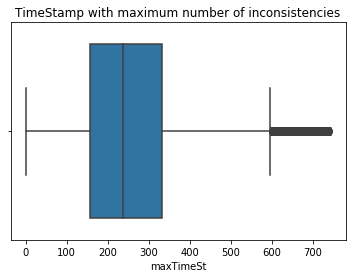

In [ ]:
d=sns.boxplot(df_TimeStamp0["maxTimeSt"])
plt.title("TimeStamp with maximum number of inconsistencies")
plt.savefig("Incons_MaxTimeStamp.png")

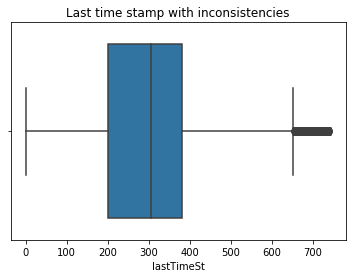

In [ ]:
e = sns.boxplot(df_TimeStamp0["lastTimeSt"])
plt.title("Last time stamp with inconsistencies")
plt.savefig("Incons_LastTimeStamp.png")

In [ ]:
# # # analysis of destination accounts when the newbalanceOrig is negative 
import numpy as np
rowNam0_C = rowNam0 = dddDest[dddDest["nameDest"] > 1].index.values# for destination accounts with more than one balance inconsistency 
df_0C = df[df["nameDest"].isin(rowNam0_C) & df["difamountOD"] != 0]

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amountOrig,amountDest,difamountAmOr,difamountDesOr,difamountOD,difamountOrig
30,1,TRANSFER,1065.41,C1959239586,1817.00,751.59,C515132998,10330.0,11395.40,1065.41,1065.40,0.00,0.01,0.01,0.00
33,1,TRANSFER,311685.89,C1984094095,10835.00,-300850.89,C932583850,6267.0,317952.88,311685.89,311685.88,0.00,0.01,0.01,0.00
56,1,TRANSFER,110414.71,C768216420,26845.41,-83569.30,C1509514333,288800.0,399214.70,110414.71,110414.70,0.00,0.01,0.01,0.00
77,1,TRANSFER,5529.13,C867288517,8547.00,3017.87,C242131142,10206.0,15735.12,5529.13,5529.12,0.00,0.01,0.01,0.00
79,1,TRANSFER,4510.22,C280615803,10256.00,5745.77,C1254526270,10697.0,15207.22,4510.23,4510.22,-0.01,0.00,0.01,0.01


In [ ]:
df_0C["IndNegative"] = [0 if x > 0 else 1 for x in df_0C['newbalanceOrig']]

/Users/fabiotejedor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
www = pd.crosstab(df_0C.nameDest, df_0C.IndNegative).apply(lambda r: r/r.sum(), axis=1)

In [ ]:
print(www.head())
www.describe()

IndNegative         0         1
nameDest                       
C1000004082  0.166667  0.833333
C1000004940  0.285714  0.714286
C1000013769  0.285714  0.714286
C100001587   0.500000  0.500000
C1000015936  0.272727  0.727273


IndNegative,0,1
count,296792.000000,296792.000000
mean,0.293455,0.706545
std,0.219262,0.219262
min,0.000000,0.000000
25%,0.142857,0.571429
50%,0.285714,0.714286
75%,0.428571,0.857143
max,1.000000,1.000000


##### Inconsistencies for 0.02

In [ ]:
incon_1 = pd.DataFrame(inconsistent.loc[inconsistent["difamountOD"] == vect_Incon['incon_']])
incon_1.head()

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amountOrig,difamountOrig,amountDest,difamountOD
41,1,TRANSFER,3448.92,C2103763750,0.0,-3448.93,M335107734,0.00,3448.91,3448.93,0.01,3448.91,0.02
89,1,TRANSFER,5149.66,C1955990522,4782.0,-367.67,C1330106945,52752.00,57901.65,5149.67,0.01,5149.65,0.02
90,1,TRANSFER,7292.16,C69673470,216827.0,209534.83,M1082411691,0.00,7292.15,7292.17,0.01,7292.15,0.02
94,1,TRANSFER,2998.04,C71802912,12030.0,9031.95,M2134271532,0.00,2998.03,2998.05,0.01,2998.03,0.02
116,1,TRANSFER,761507.39,C412788346,0.0,-761507.40,C1590550415,1280036.22,2041543.60,761507.40,0.01,761507.38,0.02


In [ ]:
lll = pd.DataFrame(pd.value_counts(incon_1.nameOrig))
lllOrig = lll.sort_values("nameOrig", ascending=False)
print(lllOrig.head())
df[(df["nameOrig"] == "C1501901797")].head()


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amountOrig,difamountOrig,amountDest,difamountOD
4496426,277,TRANSFER,0.01,C1501901797,29057.00,29056.99,C52983754,7968.52,7968.53,0.01,0.00,0.01,0.00
4496427,277,TRANSFER,108833.16,C1501901797,29057.00,-79776.16,C483048584,286829.03,395662.17,108833.16,0.00,108833.14,0.02
7697516,690,TRANSFER,181805.43,C1501901797,-79776.16,-261581.60,C1095685785,1221657.85,1403463.27,181805.44,0.01,181805.42,0.02


In [ ]:
ddd = pd.DataFrame(pd.value_counts(incon_1.nameDest))
dddDest = ddd.sort_values("nameDest", ascending=False)
print(dddDest.head())
df[(df["nameDest"] == "C1286084959")].head(n = 15)

             nameDest
C1286084959        21
C1068824137        13
C1870252780        13
C89146006          13
C667346055         13


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amountOrig,difamountOrig,amountDest,difamountOD
122,1,TRANSFER,583848.46,C1839168128,0.00,-583848.46,C1286084959,0.30,583848.76,583848.46,0.00,583848.46,0.00
445,1,TRANSFER,176334.26,C169880779,45136.00,-131198.26,C1286084959,583849.59,760183.84,176334.26,0.00,176334.25,0.01
468,1,TRANSFER,373068.26,C1047934137,20034.00,-353034.26,C1286084959,760183.94,1133252.20,373068.26,0.00,373068.26,0.00
568,1,TRANSFER,403418.39,C848097505,3834666.95,3431248.56,C1286084959,1133252.45,1536670.83,403418.39,0.00,403418.38,0.01
782,1,TRANSFER,222126.95,C870322840,6688712.64,6466585.69,C1286084959,1536671.42,1758798.35,222126.95,0.00,222126.93,0.02
803,1,TRANSFER,317393.38,C1197721383,8906617.38,8589224.00,C1286084959,1758798.42,2076191.79,317393.38,0.00,317393.37,0.01
852,1,TRANSFER,18288.91,C1049590050,0.00,-18288.92,C1286084959,2076191.95,2094480.85,18288.92,0.01,18288.90,0.02
973,1,TRANSFER,483544.30,C593447952,0.00,-483544.30,C1286084959,2094481.24,2578025.54,483544.30,0.00,483544.30,0.00
1016,1,TRANSFER,607616.73,C1267042315,0.00,-607616.73,C1286084959,2578025.67,3185642.40,607616.73,0.00,607616.73,0.00
1410,1,TRANSFER,789419.02,C883678948,0.00,-789419.02,C1286084959,3185643.42,3975062.44,789419.02,0.00,789419.02,0.00
